In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sunshine-hours-for-cities-around-the-world/Sunshine hours for cities in the world.csv


In [2]:
data = pd.read_csv('/kaggle/input/sunshine-hours-for-cities-around-the-world/Sunshine hours for cities in the world.csv')
data

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,New Zealand,Wellington,240.3,205.0,194.7,153.8,126.0,102.3,111.4,137.2,163.2,191.1,210.8,222.9,2058.7
388,New Zealand,Hamilton,229.8,192.9,193.3,165.1,138.3,112.8,126.4,144.1,147.5,174.8,187.1,207.6,2019.6
389,New Zealand,Auckland,228.8,194.9,189.2,157.3,139.8,110.3,128.1,142.9,148.6,178.1,188.1,197.2,2003.1
390,Fiji,Suva,192.2,178.0,170.5,153.0,145.7,141.0,136.4,142.6,135.0,164.3,168.0,195.3,1922.0


## Task1: Check null values and duplicates

In [3]:
data.isnull().sum()

Country    0
City       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
Year       0
dtype: int64

it means, there are no null values in dataset

In [4]:
## drop duplicates
data = data.drop_duplicates()
data

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,New Zealand,Wellington,240.3,205.0,194.7,153.8,126.0,102.3,111.4,137.2,163.2,191.1,210.8,222.9,2058.7
388,New Zealand,Hamilton,229.8,192.9,193.3,165.1,138.3,112.8,126.4,144.1,147.5,174.8,187.1,207.6,2019.6
389,New Zealand,Auckland,228.8,194.9,189.2,157.3,139.8,110.3,128.1,142.9,148.6,178.1,188.1,197.2,2003.1
390,Fiji,Suva,192.2,178.0,170.5,153.0,145.7,141.0,136.4,142.6,135.0,164.3,168.0,195.3,1922.0


it means, there were no duplicates rows

## Task2: Analysis on Country column

In [5]:
data['Country'].nunique()

141

In [6]:
data.groupby('Country').agg(count = ('Country','size'))

,count
Country,
Afghanistan,1
Albania,1
Algeria,2
Angola,1
Argentina,6
...,...
Uzbekistan,1
Venezuela,3
Vietnam,4


There were total 141 countries are there.

In [7]:
data.groupby('Country').agg(count = ('Country','size')).reset_index().sort_values(by = 'count',ascending = False).values[0]

array(['United States', 54], dtype=object)

In [8]:
## Now, find top 10 countries that have maximum citties
top_10_country = data.groupby('Country').agg(count = ('Country','size')).reset_index()
top_10_country = top_10_country.sort_values(by = 'count', ascending=False)[:10]
top_10_country

,Country,count
134,United States,54
6,Australia,15
25,China,15
16,Brazil,11
21,Canada,9
107,Russia,8
75,Madagascar,6
117,South Africa,6
4,Argentina,6
120,Spain,6


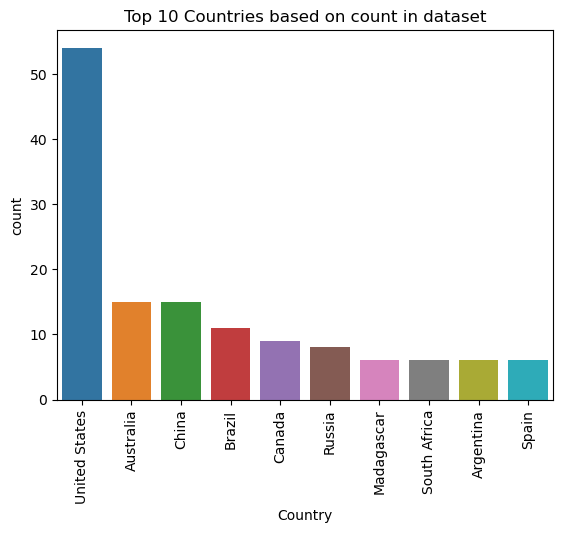

In [9]:
sns.barplot(x = 'Country', y='count', data=top_10_country)
plt.title('Top 10 Countries based on count in dataset')
plt.xticks(rotation=90)
plt.show()

it means, most cities are present in dataset of United States

In [10]:
 data1 = data.groupby('Country')['Year'].max().sort_values(ascending = False).reset_index()[:10]

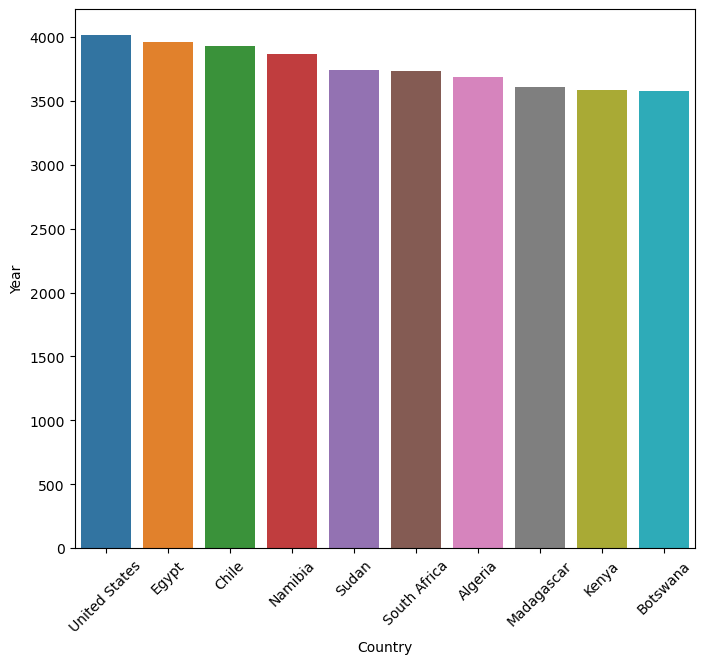

In [11]:
plt.figure(figsize = (8,7))
sns.barplot(x = 'Country',y = 'Year', data = data1)
plt.xticks(rotation = 45)
plt.show()

In [12]:
## Analyze and visualize like which country has highest sunshine hours in a complete year.
top_10_country_year = data.groupby('Country').agg(max_sunshine_hour = ('Year', 'max')).reset_index()
top_10_country_year = top_10_country_year.sort_values(by = 'max_sunshine_hour', ascending=False)[:10]
top_10_country_year

,Country,max_sunshine_hour
134,United States,4015.3
35,Egypt,3958.0
24,Chile,3926.2
87,Namibia,3870.0
121,Sudan,3737.1
117,South Africa,3731.8
2,Algeria,3686.0
75,Madagascar,3610.0
69,Kenya,3582.0
15,Botswana,3579.0


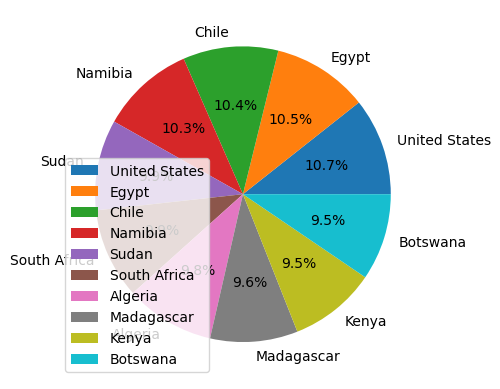

In [13]:
labels = top_10_country_year['Country']
plt.pie(x=top_10_country_year['max_sunshine_hour'], labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

it means, United States has maximum sunshine hours in their cities in a complete year

## Task3: Analysis City column

In [14]:
data['City'].nunique()

391

it means, there were total 391 unique cities are there, but ideally it should be 392.

In [15]:
data['City'].value_counts()

La Paz      2
Gagnoa      1
Valencia    1
La Ceiba    1
Winnipeg    1
           ..
Wuhan       1
Ürümqi      1
Tianjin     1
Shanghai    1
Dunedin     1
Name: City, Length: 391, dtype: int64

it means, city "La Paz" is present 2 times in dataset

In [16]:
data[data['City'] == 'La Paz']

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
267,Mexico,La Paz,200.0,234.0,271.0,292.0,332.0,322.0,287.0,258.0,257.0,272.0,233.0,190.0,3148.0
336,Bolivia,La Paz,182.9,152.6,148.8,165.0,222.7,240.0,235.6,217.0,189.0,179.8,171.0,186.0,2288.9


La Paz city present in both country "Mexico" and "Bolivia".

In [17]:
data['City'].nunique()

391

In [18]:
data.groupby('City').agg(count = ('Year','size')).sort_values(by = 'count',ascending = False)

,count
City,
La Paz,2
Aarhus,1
Nouadhibou,1
Ouahigouya,1
Ouagadougou,1
...,...
Fuzhou,1
Fresno,1
Frankfurt,1


In [19]:
data[['City', 'Year']]

,City,Year
0,Gagnoa,1823.0
1,Bouaké,2092.0
2,Abidjan,2296.0
3,Odienné,2638.6
4,Ferké,2757.0
...,...,...
387,Wellington,2058.7
388,Hamilton,2019.6
389,Auckland,2003.1
390,Suva,1922.0


In [20]:
## Now, find which city has maximum sunshine hours.
max_sunshine_city = data[['City', 'Year']]
max_sunshine_city = max_sunshine_city.sort_values(by = 'Year', ascending=False)[:10]
max_sunshine_city

,City,Year
329,Yuma,4015.3
52,Marsa Alam,3958.0
50,Dakhla Oasis,3943.4
349,Calama,3926.2
311,Phoenix,3871.6
109,Keetmanshoop,3870.0
297,Las Vegas,3825.3
324,Tucson,3806.0
290,El Paso,3762.5
25,Khartoum,3737.1


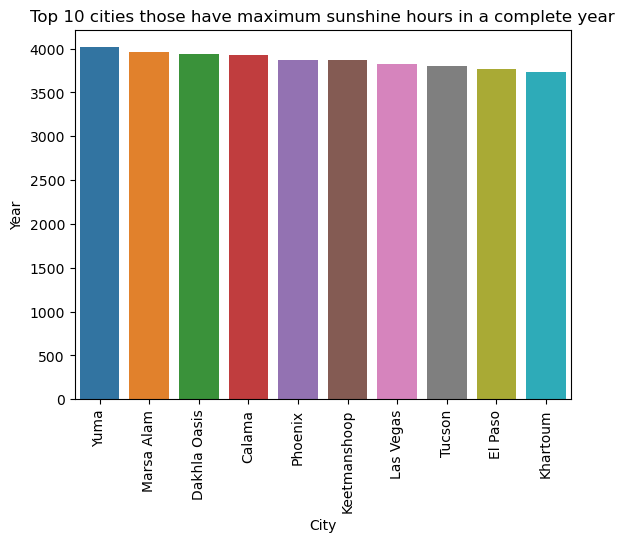

In [21]:
sns.barplot(x = 'City', y='Year', data=max_sunshine_city)
plt.title('Top 10 cities those have maximum sunshine hours in a complete year')
plt.xticks(rotation=90)
plt.show()

Yuma city has mzimum sunshine hours

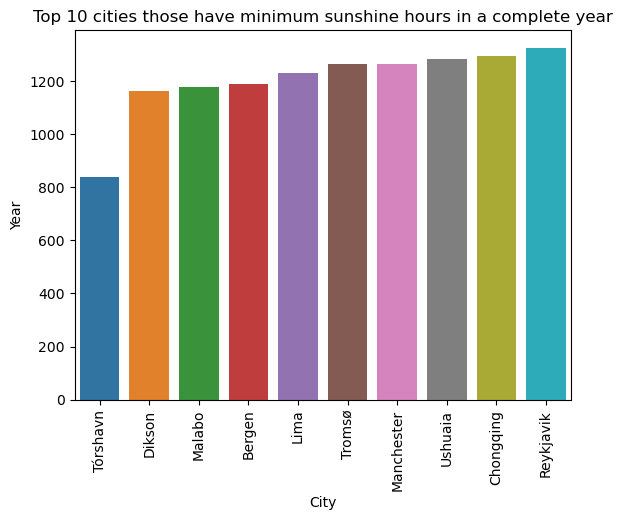

In [22]:
## Now, find for minimum
min_sunshine_city = data[['City', 'Year']]
min_sunshine_city = min_sunshine_city.sort_values(by = 'Year', ascending=True)[:10]

sns.barplot(x = 'City', y='Year', data=min_sunshine_city)
plt.title('Top 10 cities those have minimum sunshine hours in a complete year')
plt.xticks(rotation=90)
plt.show()

it means, city "Torshavn" has minimum sunshine hours in all cities.

## Task4: Analysis month columns

In [23]:
df = data.describe()
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,180.949745,178.531760,207.873980,219.239541,241.283929,236.601020,243.888520,236.097959,212.708163,207.494643,182.705612,174.421429,2522.010332
std,81.562624,64.911199,58.192928,52.704589,61.847905,73.762387,81.396865,73.439465,62.837965,67.716309,78.338583,84.166812,625.751416
min,0.000000,22.600000,47.000000,65.100000,68.200000,45.000000,28.600000,32.300000,37.300000,24.800000,0.000000,0.000000,840.000000
25%,124.000000,132.500000,164.000000,183.000000,196.600000,176.600000,179.950000,185.925000,165.075000,157.200000,127.000000,117.300000,2037.575000
50%,182.450000,178.450000,210.750000,219.550000,248.050000,250.000000,250.900000,242.000000,218.200000,211.100000,184.450000,171.500000,2511.150000
75%,248.000000,229.000000,252.000000,254.600000,285.050000,288.825000,308.075000,294.625000,261.000000,261.050000,248.750000,245.125000,2995.000000
max,362.700000,315.000000,335.500000,365.500000,407.400000,419.500000,440.200000,406.900000,347.800000,356.500000,363.000000,367.000000,4015.300000


In [24]:
df['Jan']['mean']

180.9497448979592

In [25]:
## visualize the average sunshine hours for each month.
df_month = []
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in cols:
    month = {}
    month['month'] = col
    month['avg'] = df[col]['mean']
    month['min'] = df[col]['min']
    month['max'] = df[col]['max']
    df_month.append(month)
df_month = pd.DataFrame(df_month)
df_month

,month,avg,min,max
0,Jan,180.949745,0.0,362.7
1,Feb,178.531760,22.6,315.0
2,Mar,207.873980,47.0,335.5
3,Apr,219.239541,65.1,365.5
4,May,241.283929,68.2,407.4
5,Jun,236.601020,45.0,419.5
6,Jul,243.888520,28.6,440.2
7,Aug,236.097959,32.3,406.9
8,Sep,212.708163,37.3,347.8
9,Oct,207.494643,24.8,356.5


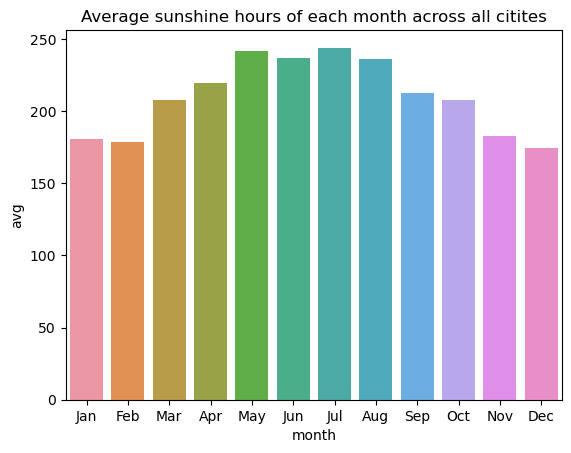

In [26]:
sns.barplot(x = 'month', y='avg', data=df_month)
plt.title('Average sunshine hours of each month across all citites')
plt.show()

it means, December month average sunshine hours are very low

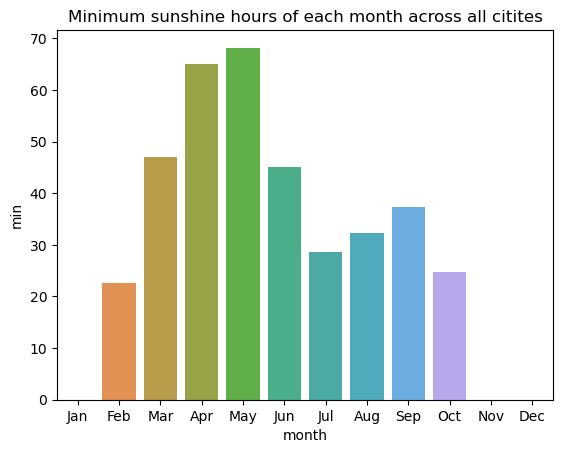

In [27]:
sns.barplot(x = 'month', y='min', data=df_month)
plt.title('Minimum sunshine hours of each month across all citites')
plt.show()

it means, month Jan, Nov and Dec have 0 as min sunshine hours in some cities

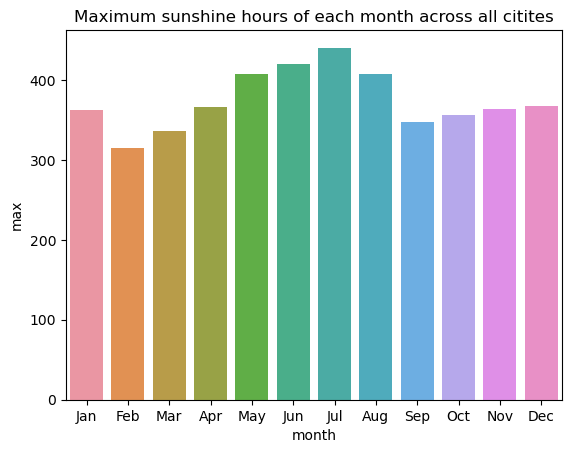

In [28]:
sns.barplot(x = 'month', y='max', data=df_month)
plt.title('Maximum sunshine hours of each month across all citites')
plt.show()

it means, month July has maximum sunshine hours in some city.

**Thanks for visiting the notebook**
## if you like the notebook, please upvote
**Open to Suggestions! All feedback is welcome and I'll be sure to review it.**